# **데이터 분석**

이혼 종류별 데이터와, 이혼 사유별 데이터를 통하여
데이터의 전처리(가공) 과정부터 분석, 그리고 시각화하는 기술을 습득한다.



## **목차**
- ***1. 종류별 이혼건수 데이터 가공/분석/시각화***
- 종류별 이혼건수 데이터 전처리
- 이혼 종류 상위 분석
- 분석한 데이터 시각화
- 2000년대, 2010년대 이후 종류별 백분율
- 2000년대, 2010년대 이후 종류별 비교 시각화
-----
- ***2. 사유별 이혼건수 데이터 예측/가공/분석/시각화***
- 기존 데이터의 한계
- 2018~2023년 데이터 예측
- 각 사유의 비율 분석
- 2000년대, 2010년대 이후 사유별 백분율
- 2000년대, 2010년대 이후 사유별 비교 시각화
------
- ***3. 두 가지 데이터 비교 및 결론***


# **<1> 종류별 이혼건수 데이터 가공/분석/시각화**

가장 먼저 종류별 이혼건수 데이터를 불러와 헤드를 확인해봅니다.

In [31]:
import pandas as pd

file_path = '/content/종류별_이혼건수.csv'
df = pd.read_csv(file_path)
print(df.head())

     시점     소계   합의이혼  재판이혼   미상
0  2000  25477  21515  3794  168
1  2001  28962  23914  4791  257
2  2002  29351  24670  4504  177
3  2003  32499  28193  4054  252
4  2004  26994  22780  4025  189


데이터는 시점, 소계, 합의이혼, 재판이혼, 미상으로 확인됩니다.

합의이혼, 재판이혼, 미상, 소계의 데이터를 정수형으로 전처리 해줍니다.
이는 통계 및 분석을 위한 전처리입니다.

In [32]:
# 정수형으로 변환
columns_to_convert = ['시점','합의이혼', '재판이혼', '미상']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

# 변환 결과 확인
print(df.dtypes)
print(df.head())

시점        int16
소계        int64
합의이혼      int16
재판이혼      int16
미상      float64
dtype: object
     시점     소계   합의이혼  재판이혼     미상
0  2000  25477  21515  3794  168.0
1  2001  28962  23914  4791  257.0
2  2002  29351  24670  4504  177.0
3  2003  32499  28193  4054  252.0
4  2004  26994  22780  4025  189.0


종류별 이혼건수에서 2001~2023년 사이 가장 많은 이혼 종류는 무엇이었는지 알아봅니다.

한글로 하면 자꾸 깨져서 영어로 이름을 mapping 시켰습니다.

In [33]:
import warnings
warnings.filterwarnings("ignore")  # 모든 경고 메시지 숨김

# 데이터 로드
file_path = '/content/종류별_이혼건수.csv'
divorce_types = pd.read_csv(file_path)

# 데이터 전처리: 열 이름 수정 및 연도 열의 이름을 Year로 변경
divorce_types.rename(columns={divorce_types.columns[0]: 'Year'}, inplace=True)

# 영어로 컬럼 이름 변경
column_mapping = {
    '소계': 'Total',
    '합의이혼': 'Mutual',
    '재판이혼': 'Litigation',
    '미상': 'Unknown'
}
divorce_types.rename(columns=column_mapping, inplace=True)

In [34]:
# 2001~2023년 사이 가장 많은 이혼 종류 찾기 (Total, Unknown 제외)
filtered_columns = ['Mutual', 'Litigation']
most_divorced_type = divorce_types[filtered_columns].sum().idxmax()
most_divorced_count = divorce_types[most_divorced_type].sum()

# 결과 출력
print(f"2001년부터 2023년까지 가장 많은 이혼 종류는 '{most_divorced_type}'이며, 총 {most_divorced_count}건입니다.")

2001년부터 2023년까지 가장 많은 이혼 종류는 'Mutual'이며, 총 408432건입니다.


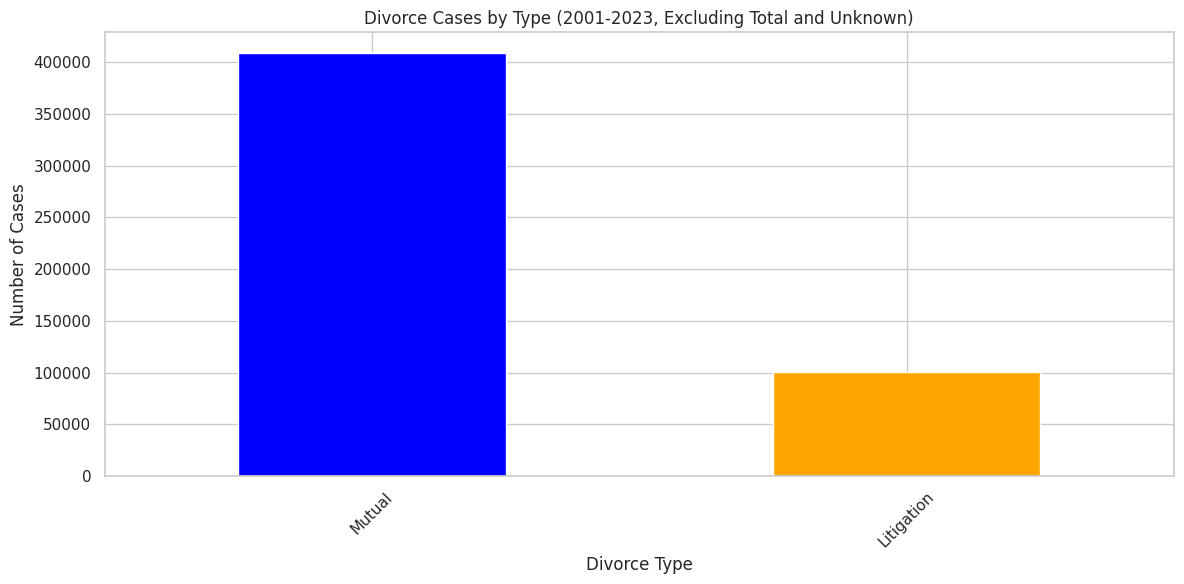

In [35]:

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Total과 Unknown 제외한 Mutual과 Litigation만 그래프에 표시
plt.figure()
divorce_types.set_index('Year')[filtered_columns].sum().plot(kind='bar', color=['blue', 'orange'])
plt.title('Divorce Cases by Type (2001-2023, Excluding Total and Unknown)')
plt.ylabel('Number of Cases')
plt.xlabel('Divorce Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


이제 각 해에 이혼 종류별 백분율이 얼마나 차지하는지를 분석합니다.

In [36]:

divorce_types = divorce_types.drop(columns=['Total', 'Unknown'], errors='ignore')

# 각 해의 총 이혼 건수 대비 각 종류의 비율(%) 계산
divorce_types['Total_Count'] = divorce_types.sum(axis=1)
for col in divorce_types.columns[1:-1]:
    divorce_types[col + '_Percent'] = (divorce_types[col] / divorce_types['Total_Count'] * 100).round(2)

print("비율 계산 완료!")
print(divorce_types.head())

비율 계산 완료!
   Year  Mutual  Litigation  Total_Count  Mutual_Percent  Litigation_Percent
0  2000   21515        3794        27309           78.78               13.89
1  2001   23914        4791        30706           77.88               15.60
2  2002   24670        4504        31176           79.13               14.45
3  2003   28193        4054        34250           82.32               11.84
4  2004   22780        4025        28809           79.07               13.97


이를 그래프로 시각화합니다.

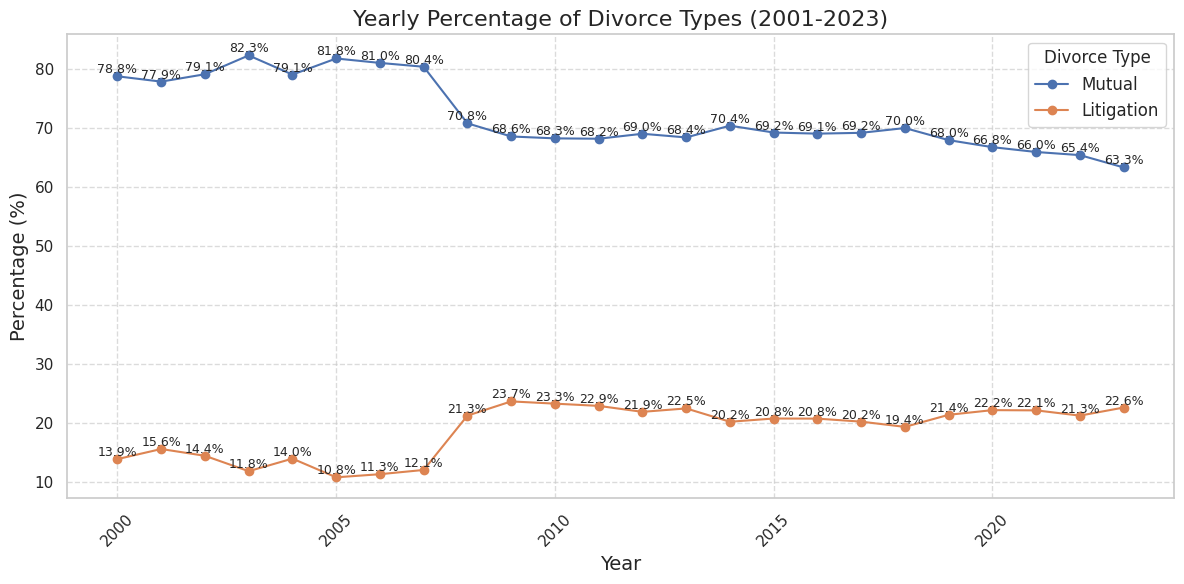

In [38]:

# 시각화: 연도별 각 이혼 종류의 비율 변화
plt.figure()
for col in ['Mutual_Percent', 'Litigation_Percent']:
    plt.plot(divorce_types['Year'], divorce_types[col], marker='o', label=col.split('_')[0])  # _Percent 제거

    # 각 포인트에 텍스트 표시
    for x, y in zip(divorce_types['Year'], divorce_types[col]):
        plt.text(x, y, f'{y:.1f}%', fontsize=9, ha='center', va='bottom')

# 그래프 제목 및 축 설정
plt.title('Yearly Percentage of Divorce Types (2001-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Divorce Type', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 표시
plt.show()

이를 통해 기존보다 합의 이혼은 하락 추세를 보이고 있으나, **재판 이혼이 늘어나는 것**을 알 수 있었습니다.<br>
그렇다면, **어떤 사유로 이혼을 하는지에 대한 데이터를 분석함으로서, 어느정도 사유를 유추**해볼 수 있지 않을까요?